### Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


In [47]:
#Imports
import pandas as pd
from matplotlib import pyplot as plt

#### EDA

In [48]:
data_url = 'https://raw.githubusercontent.com/Nolanole/Shopify_Internship_application/master/data/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set.csv'
df = pd.read_csv(data_url)
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True) 
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [49]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [51]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [52]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [53]:
df['created_at'].min(), df['created_at'].max() 

(Timestamp('2017-03-01 00:08:09'), Timestamp('2017-03-30 23:55:35'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cc6d1160>]],
      dtype=object)

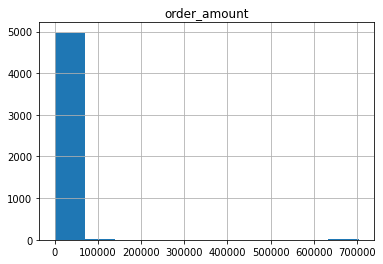

In [54]:
df.hist('order_amount', bins=10)

#### Answers

a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [55]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

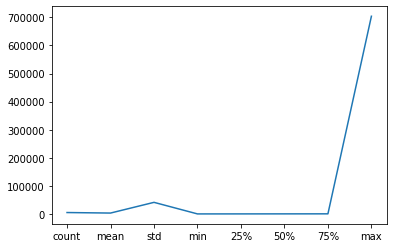

In [56]:
df['order_amount'].describe().plot()

Looks like there are some extremely large orders ($704,000) that are outliers which completely skew the mean value for order amount.

b) What metric would you report for this dataset?

You could remove the extremely large outlier orders from the data and recalculate the mean, or you could just use the median 50th percentile value for order amount.

c) What is its value?

In [57]:
median = round(df['order_amount'].median(), 2)
print('${:0.2f}'.format(median))

$284.00
